In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def display(img):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.show()

def display_gray(img):
    plt.imshow(img, cmap='gray')
    plt.show()


(448, 800, 3)


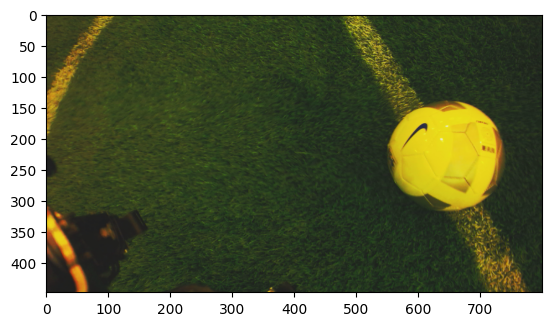

In [23]:
img = cv2.imread("images/log1/151-rgb.png")
print(img.shape)
display(img)

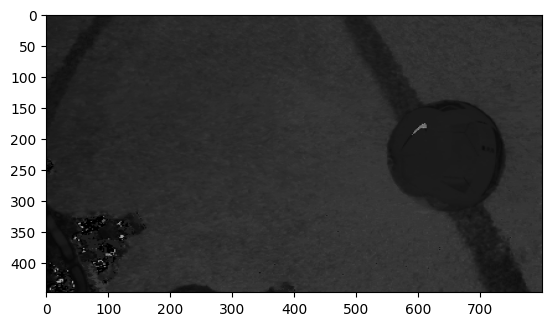

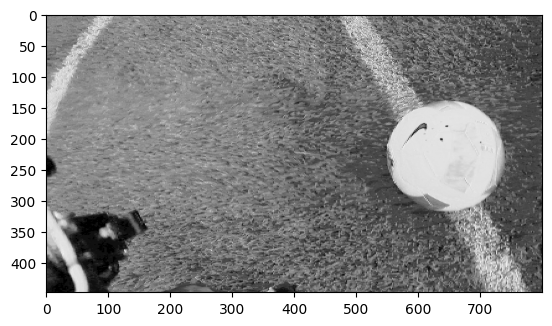

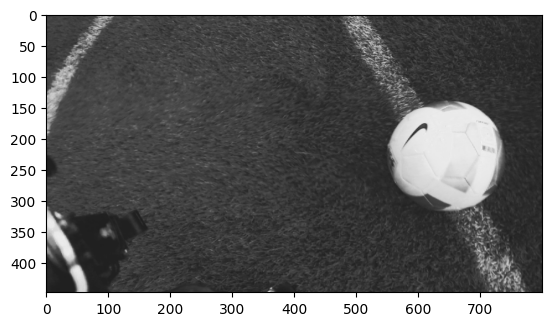

In [24]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

h, s, v = cv2.split(img_hsv)

display(h)
display(s)
display(v)

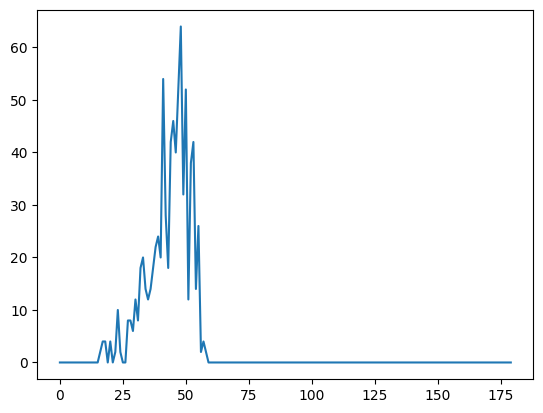

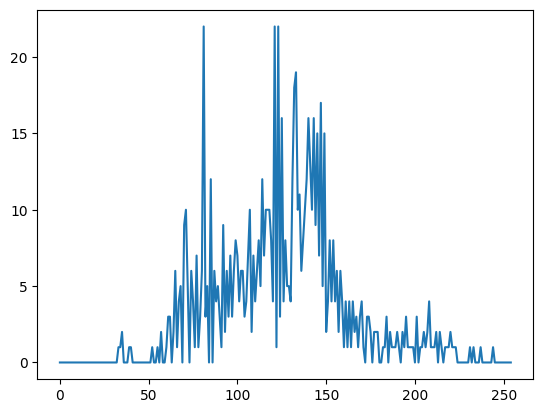

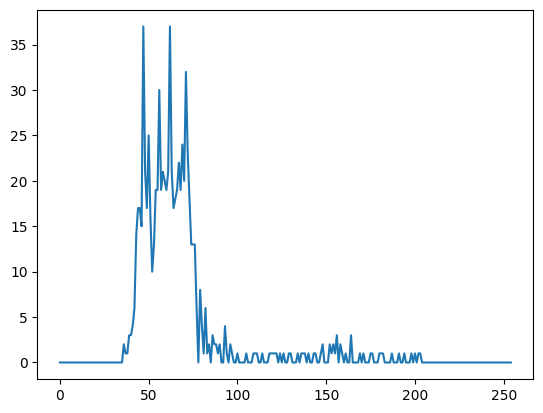

In [25]:
hist_h = cv2.calcHist(h,[0], None, [180], [0,180])
hist_s = cv2.calcHist(s,[0], None, [255], [0,255])
hist_v = cv2.calcHist(v,[0], None, [255], [0,255])

plt.plot(hist_h)
plt.show()
plt.plot(hist_s)
plt.show()
plt.plot(hist_v)
plt.show()

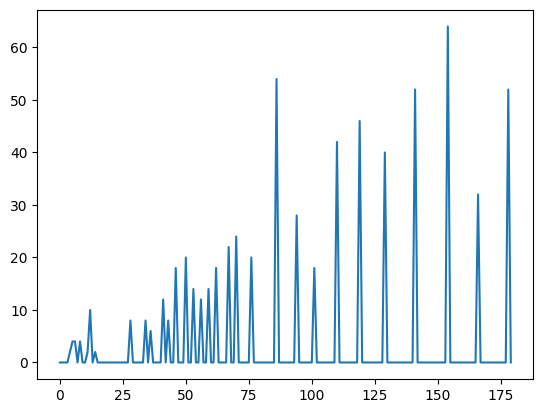

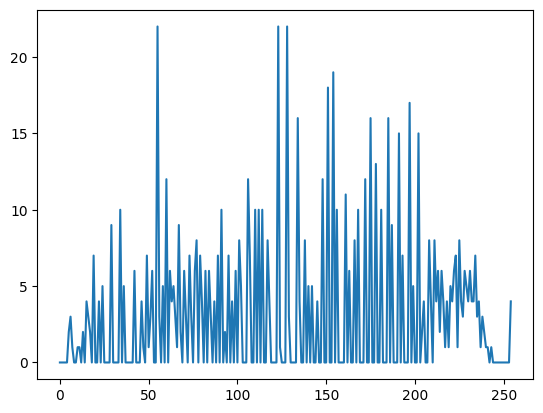

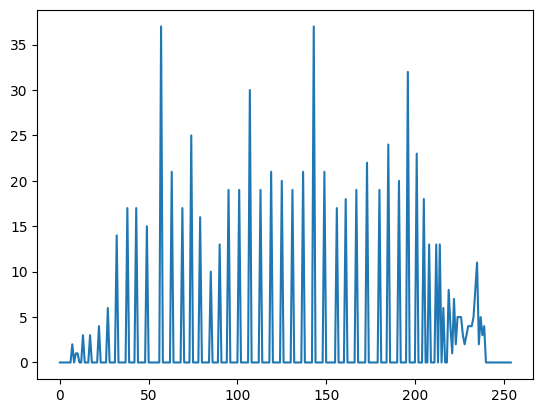

In [28]:
seq = cv2.equalizeHist(s)
heq = cv2.equalizeHist(h)
veq = cv2.equalizeHist(v)

hist_heq = cv2.calcHist(heq,[0], None, [180], [0,180])
hist_seq = cv2.calcHist(seq,[0], None, [255], [0,255])
hist_veq = cv2.calcHist(veq,[0], None, [255], [0,255])

plt.plot(hist_heq)
plt.show()
plt.plot(hist_seq)
plt.show()
plt.plot(hist_veq)
plt.show()

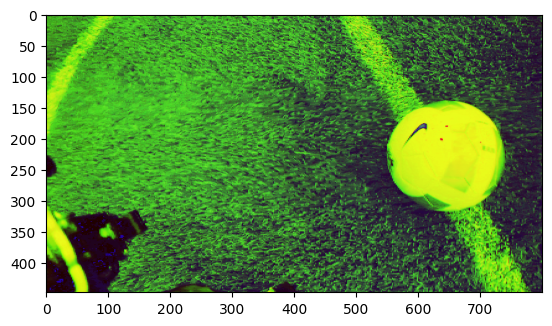

In [37]:
hsv = cv2.merge([h,seq,v])
display(hsv)

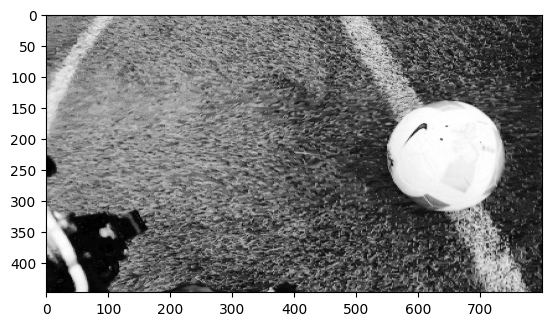

In [38]:
gray = cv2.cvtColor(hsv, cv2.COLOR_BGR2GRAY)
display_gray(gray)

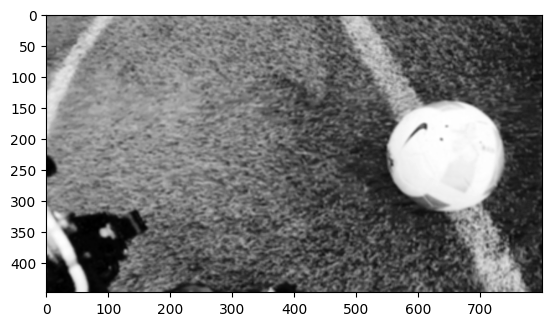

In [42]:
blur = cv2.GaussianBlur(gray, (5,5), 2)
display_gray(blur)

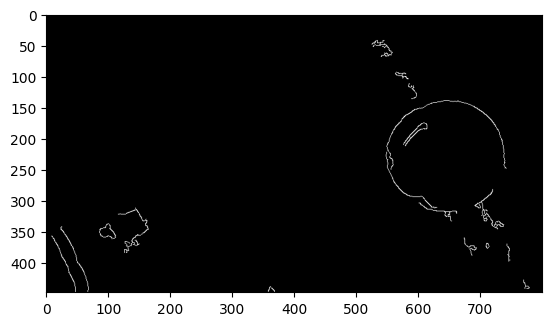

In [46]:
edges = cv2.Canny(blur,50,300)
display_gray(edges)

In [47]:

circles = cv2.HoughCircles(edges, cv2.HOUGH_GRADIENT, 2.5, 200)
print(circles)

[[[648.75 231.25  91.75]]]


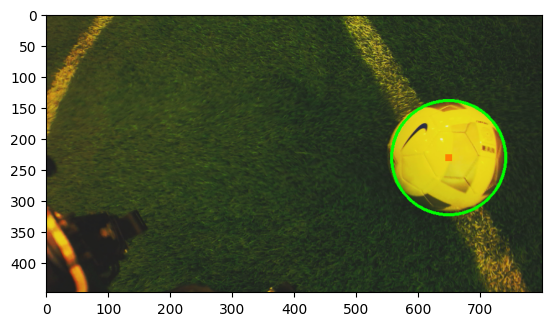

In [48]:
output = img.copy()
if circles is not None:
	# convert the (x, y) coordinates and radius of the circles to integers
    circles = np.round(circles[0, :]).astype("int")
	# loop over the (x, y) coordinates and radius of the circles
    for (x, y, r) in circles:
		# draw the circle in the output image, then draw a rectangle
		# corresponding to the center of the circle
        cv2.circle(output, (x, y), r, (0, 255, 0), 4)
        cv2.rectangle(output, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)
        break
	# show the output image
    display(output)